In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-ratings/chocolate.csv


In [3]:
df = pd.read_csv('/kaggle/input/chocolate-ratings/chocolate.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   int64  
 1   company_manufacturer              2530 non-null   object 
 2   company_location                  2530 non-null   object 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   object 
 5   specific_bean_origin_or_bar_name  2530 non-null   object 
 6   cocoa_percent                     2530 non-null   object 
 7   ingredients                       2443 non-null   object 
 8   most_memorable_characteristics    2530 non-null   object 
 9   rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [5]:
plt.style.use('ggplot')

In [6]:
df.isnull().sum()

ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         87
most_memorable_characteristics       0
rating                               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df_clean = df.copy()

In [9]:
df_clean.dropna(inplace=True)

In [10]:
df_clean.columns

Index(['ref', 'company_manufacturer', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'ingredients', 'most_memorable_characteristics',
       'rating'],
      dtype='object')

In [11]:
df_clean.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [12]:
df_clean.cocoa_percent = df_clean.cocoa_percent.str.strip("%")

In [13]:
df_clean['review_date'] = df_clean.review_date.astype('int64')

<Axes: title={'center': 'Top 10 Manufacturers by average rating'}>

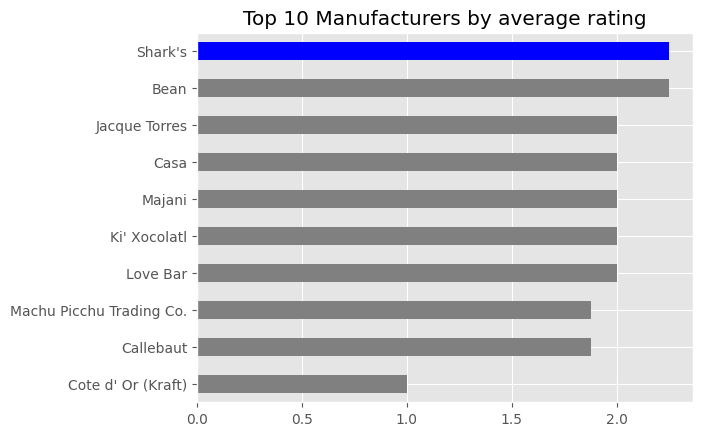

In [14]:
df.groupby('company_manufacturer')['rating'].mean().sort_values().iloc[:10].plot.barh(ylabel='',color=['grey']*9+['blue'], title='Top 10 Manufacturers by average rating')

In [15]:
df_clean.cocoa_percent = pd.to_numeric(df_clean.cocoa_percent,errors='coerce')

In [16]:
df_clean.cocoa_percent.dtype

dtype('float64')

<Axes: title={'center': 'Cocoa percent per Year'}>

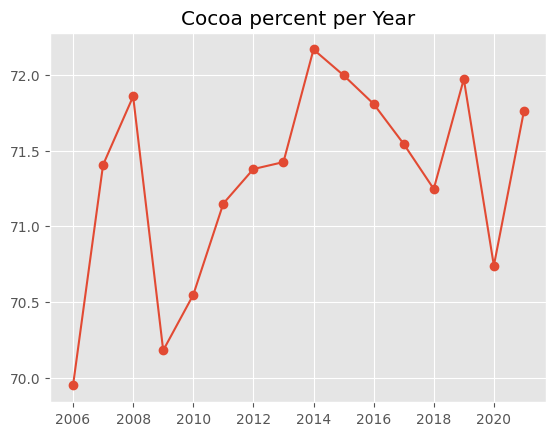

In [17]:
df_clean.groupby('review_date')['cocoa_percent'].mean().plot.line(marker='o', xlabel='', title='Cocoa percent per Year')

In [18]:
df.columns

Index(['ref', 'company_manufacturer', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'ingredients', 'most_memorable_characteristics',
       'rating'],
      dtype='object')

<Axes: title={'center': 'Average Rating per Country of Bean origin'}>

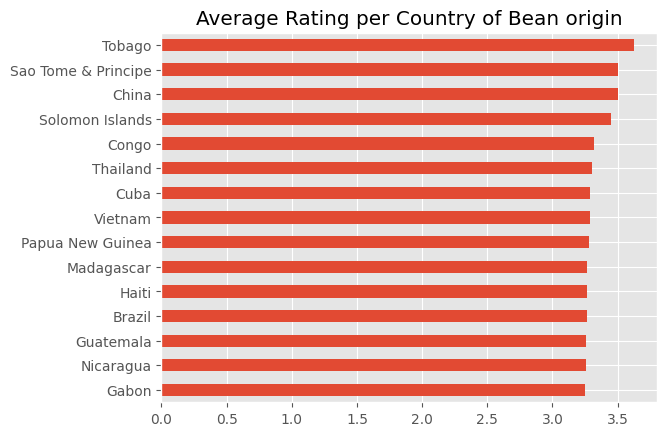

In [23]:
df.groupby('country_of_bean_origin')['rating'].mean().sort_values(ascending=False).iloc[:15].sort_values().plot.barh(ylabel='', title='Average Rating per Country of Bean origin')

In [24]:
df.most_memorable_characteristics.head()

0            rich cocoa, fatty, bready
1               cocoa, vegetal, savory
2         cocoa, blackberry, full body
3                  chewy, off, rubbery
4    fatty, earthy, moss, nutty,chalky
Name: most_memorable_characteristics, dtype: object

In [25]:
df['cocoa_presence'] = df.most_memorable_characteristics.str.count('cocoa').map(lambda a: True if a>0 else False) 

In [31]:
'{:.1f}% of the chocolates have cocoa'.format((df.cocoa_presence.sum()/df.shape[0])*100)

'16.5% of the chocolates have cocoa'

In [32]:
df.groupby('cocoa_presence')['rating'].mean()

cocoa_presence
False    3.160748
True     3.376196
Name: rating, dtype: float64

In [33]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(df.loc[df.cocoa_presence==True,'rating'],df.loc[df.cocoa_presence==False,'rating'])
if pval<0.05:
    print('Cocoa does have an influence on rating of chocolate.')
else:
    print('Cocoa does not have on influence on influence on rating of chocolate.')

Cocoa does have an influence on rating of chocolate.


In [34]:
df.ingredients.head()

0    3- B,S,C
1    3- B,S,C
2    3- B,S,C
3    3- B,S,C
4    3- B,S,C
Name: ingredients, dtype: object

In [51]:
j=[]
count=0
for i in df.most_memorable_characteristics:
    j.append(str(i))
j = ','.join(j)
j=j.split(',')
j=[i.strip() for i in j]
unique_chars = set(j)

In [52]:
len(unique_chars)

972

In [57]:
counts = {}
for i in j:
    if i in counts.keys():
        counts[i]+=1
    else:
        counts[i]=1

In [61]:
max(counts,key=lambda k: counts[k])

'sweet'

In [66]:
df['sweet_chocolate'] = df.most_memorable_characteristics.str.count('sweet').apply(lambda a: True if a>0 else False)

In [63]:
'{:.1f}% of the chocolates are sweet'.format((df.sweet_chocolate.sum()/df.shape[0])*100)

'12.6% of the chocolates are sweet'

In [65]:
df.groupby('sweet_chocolate')['rating'].mean()

sweet_chocolate
False    3.216546
True     3.055818
Name: rating, dtype: float64

In [67]:
tstat, pval = ttest_ind(df.loc[df.sweet_chocolate==True,'rating'],df.loc[df.sweet_chocolate==False,'rating'])
if pval<0.05:
    print('Sweetness does have an influence on rating of chocolate.')
else:
    print('Sweetness does not have on influence on influence on rating of chocolate.')

Sweetness does have an influence on rating of chocolate.


Chocolates that are not sweet have a higher average rating.